In [5]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from scipy import io
import math

## Question 2: Partioning

In [6]:
complete_dataset = {}

for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    
    complete_dataset[data_name] = {}
    
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)
        complete_dataset[data_name][field] = data[field]


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


In [83]:
def partitionDataSet(training_data, training_labels, length):
    totalSet = np.concatenate((training_data, \
                               training_labels), axis=1)
    np.random.shuffle(totalSet)    
    
    return totalSet[0:length, :], totalSet[length:, :]

from sklearn.preprocessing import StandardScaler
from skimage.feature import hog

def createHogFeature(data):
    featurevec = None
    for row in range(0, data.shape[0]):
        if row % 1000 == 0:
            print(f"finished {row}", end=' ')

        fd, _ = hog(data[row,:].reshape(28,28), visualize=True, feature_vector=True)
        if featurevec is None:
            featurevec = fd.reshape(1, 81)
        else:
            featurevec = np.concatenate((featurevec, fd.reshape(1,81)), axis=0)
            
    return featurevec

In [84]:
#Partioning MNIST dataset
print("MNIST Dataset: ")

  ## Standardization
scaler = StandardScaler()
#scaler.fit_transform
mnist_training_std = scaler.fit_transform(createHogFeature(complete_dataset["mnist"]["training_data"]))

mnist_validation, mnist_training = partitionDataSet(mnist_training_std, \
                               complete_dataset["mnist"]["training_labels"], 10000)

mnist_validation_x = mnist_validation[:, :-1]
mnist_validation_y = mnist_validation[:, -1:]
print(f"Validation X: {mnist_validation_x.shape} \nValidation Y: {mnist_validation_y.shape}")

mnist_training_x = mnist_training[:, :-1]
mnist_training_y = mnist_training[:, -1:]
print(f"Training X: {mnist_training_x.shape} \nTraining Y: {mnist_training_y.shape}")

MNIST Dataset: 
finished 0 finished 1000 finished 2000 finished 3000 finished 4000 finished 5000 finished 6000 finished 7000 finished 8000 finished 9000 finished 10000 finished 11000 finished 12000 finished 13000 finished 14000 finished 15000 finished 16000 finished 17000 finished 18000 finished 19000 finished 20000 finished 21000 finished 22000 finished 23000 finished 24000 finished 25000 finished 26000 finished 27000 finished 28000 finished 29000 finished 30000 finished 31000 finished 32000 finished 33000 finished 34000 finished 35000 finished 36000 finished 37000 finished 38000 finished 39000 finished 40000 finished 41000 finished 42000 finished 43000 finished 44000 finished 45000 finished 46000 finished 47000 finished 48000 finished 49000 finished 50000 finished 51000 finished 52000 finished 53000 finished 54000 finished 55000 finished 56000 finished 57000 finished 58000 finished 59000 Validation X: (10000, 81) 
Validation Y: (10000, 1)
Training X: (50000, 81) 
Training Y: (50000, 

In [78]:
#Partioning spam dataset
print("Spam dataset")
partition_length = math.ceil(complete_dataset["spam"]["training_data"].shape[0]*0.2)

spam_validation, spam_training = partitionDataSet(complete_dataset["spam"]["training_data"], \
                               complete_dataset["spam"]["training_labels"], partition_length)

spam_validation_x = spam_validation[:, :-1]
spam_validation_y = spam_validation[:, -1:]
print(f"Validation X: {spam_validation_x.shape} \nValidation Y: {spam_validation_y.shape}")

spam_training_x = spam_training[:, :-1]
spam_training_y = spam_training[:, -1:]
print(f"Training X: {spam_training_x.shape} \nTraining Y: {spam_training_y.shape}")

Spam dataset
Validation X: (1035, 32) 
Validation Y: (1035, 1)
Training X: (4137, 32) 
Training Y: (4137, 1)


39256

In [10]:
#Partioning CIFAR-10 dataset
print("CIFAR-10 dataset")
cifar_validation, cifar_training = partitionDataSet(complete_dataset["cifar10"]["training_data"], \
                               complete_dataset["cifar10"]["training_labels"], 5000)

cifar_validation_x = cifar_validation[:, :-1]
cifar_validation_y = cifar_validation[:, -1:]
print(f"Validation X: {cifar_validation_x.shape} \nValidation Y: {cifar_validation_y.shape}")

cifar_training_x = cifar_training[:, :-1]
cifar_training_y = cifar_training[:, -1:]
print(f"Training X: {cifar_training_x.shape} \nTraining Y: {cifar_training_y.shape}")

CIFAR-10 dataset
Validation X: (5000, 3072) 
Validation Y: (5000, 1)
Training X: (45000, 3072) 
Training Y: (45000, 1)


## Question 3, 4 for MNIST Handrwritten Digit Classification

Creating SVC Model and training

In [85]:
#Training on MNIST Dataset

mnist_clf = svm.SVC(kernel='linear')

training_ints = [100, 200, 500, 1000, 2000, 5000, 10000]
accuracies = {"train": [], "val": []}

for num_training in training_ints:
    
    print(f"Training with {num_training} examples")
    
    training_y = np.asarray(mnist_training_y).reshape(-1)
    validation_y = np.asarray(mnist_validation_y).reshape(-1)
    
    mnist_clf.fit(mnist_training_x[:num_training, :], training_y[:num_training])
    
    
    training_acc = metrics.accuracy_score(training_y, mnist_clf.predict(mnist_training_x))
    val_acc = metrics.accuracy_score(validation_y, mnist_clf.predict(mnist_validation_x))
    
    accuracies["train"].append(training_acc)
    accuracies["val"].append(val_acc)
    
    print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")


Training with 100 examples
Training accuracy: 0.41952 
Validation Accuracy: 0.4232

Training with 200 examples
Training accuracy: 0.57422 
Validation Accuracy: 0.5818

Training with 500 examples
Training accuracy: 0.63436 
Validation Accuracy: 0.6438

Training with 1000 examples
Training accuracy: 0.79994 
Validation Accuracy: 0.8015

Training with 2000 examples
Training accuracy: 0.88534 
Validation Accuracy: 0.8923

Training with 5000 examples
Training accuracy: 0.93738 
Validation Accuracy: 0.9397

Training with 10000 examples
Training accuracy: 0.95528 
Validation Accuracy: 0.953



**Plotting Training/Validation Accuracy vs. Num Examples Trained with**

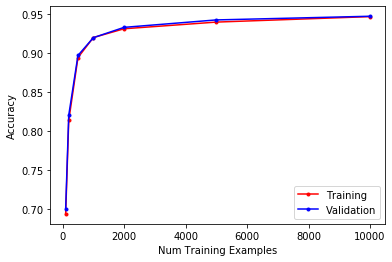

In [73]:
plt.plot(training_ints, accuracies["train"], '.r-')
plt.plot(training_ints, accuracies["val"], '.b-')
plt.legend(['Training', 'Validation'], loc=4)
plt.xlabel("Num Training Examples")
plt.ylabel("Accuracy")
plt.show()

In [74]:
# from save_csv import *
# results_to_csv(mnist_clf.predict(complete_dataset["mnist"]["test_data"]))

**Tuning regularization hyperparameter and choosing best one:**

In [86]:
Cs = [0.00001 * math.pow(10, x) for x in range(0, 8)]
num_training = 2000
accuraciesC = {"train": [], "val": []}
for c in Cs:
    print(f"Training with regularlization param {c}")
    mnist_clf = svm.SVC(kernel='linear', C=c)
    
    training_y = np.asarray(mnist_training_y).reshape(-1)
    validation_y = np.asarray(mnist_validation_y).reshape(-1)
    
    mnist_clf.fit(mnist_training_x[:num_training, :], training_y[:num_training])
    
    training_acc = metrics.accuracy_score(training_y, mnist_clf.predict(mnist_training_x))
    val_acc = metrics.accuracy_score(validation_y, mnist_clf.predict(mnist_validation_x))
    
    accuraciesC["train"].append(training_acc)
    accuraciesC["val"].append(val_acc)
    
    print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")

Training with regularlization param 1e-05
Training accuracy: 0.11216 
Validation Accuracy: 0.1134

Training with regularlization param 0.0001
Training accuracy: 0.11216 
Validation Accuracy: 0.1134

Training with regularlization param 0.001
Training accuracy: 0.11216 
Validation Accuracy: 0.1135

Training with regularlization param 0.01
Training accuracy: 0.15322 
Validation Accuracy: 0.1558

Training with regularlization param 0.1
Training accuracy: 0.52366 
Validation Accuracy: 0.5321

Training with regularlization param 1.0
Training accuracy: 0.88534 
Validation Accuracy: 0.8923

Training with regularlization param 10.0
Training accuracy: 0.92576 
Validation Accuracy: 0.9296

Training with regularlization param 100.00000000000001
Training accuracy: 0.92618 
Validation Accuracy: 0.93



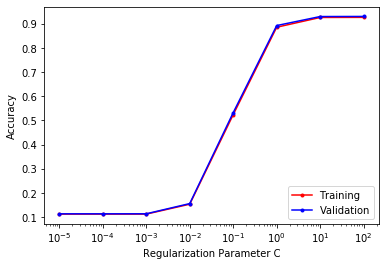

Best C for training: 100.00000000000001, Best C for validation: 100.00000000000001


In [88]:
plt.plot(Cs, accuraciesC["train"], '.r-')
plt.plot(Cs, accuraciesC["val"], '.b-')

ax = plt.gca()
ax.set_xscale('log')
plt.legend(['Training', 'Validation'], loc=4)
plt.xlabel("Regularization Parameter C")
plt.ylabel("Accuracy")

plt.show()

maxCtrain = max(zip(Cs,accuraciesC["train"]), key=lambda x: x[1])[0]
maxCval = max(zip(Cs,accuraciesC["train"]), key=lambda x: x[1])[0]

print(f"Best C for training: {maxCtrain}, Best C for validation: {maxCval}")

**Using best C and training on 30,000 examples:**

In [89]:
num_training = 20000
mnist_clf = svm.SVC(kernel='linear', C=100)
    
training_y = np.asarray(mnist_training_y).reshape(-1)
validation_y = np.asarray(mnist_validation_y).reshape(-1)

mnist_clf.fit(mnist_training_x[:num_training, :], training_y[:num_training])


training_acc = metrics.accuracy_score(training_y, mnist_clf.predict(mnist_training_x))
val_acc = metrics.accuracy_score(validation_y, mnist_clf.predict(mnist_validation_x))

# accuracies["train"].append(training_acc)
# accuracies["val"].append(val_acc)

print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")

Training accuracy: 0.9799 
Validation Accuracy: 0.9689



**Running best MNIST linear SVM model on test set and saving predictions:**

In [14]:
from save_csv import *
results_to_csv(mnist_clf.predict(scaler.fit_transform(createHogFeature(complete_dataset["mnist"]["test_data"]))))

### Using Non-linear SVM Classifier

Training with regularlization param 1e-05
Training accuracy: 0.11216 
Validation Accuracy: 0.1134

Training with regularlization param 0.0001
Training accuracy: 0.11216 
Validation Accuracy: 0.1134

Training with regularlization param 0.001
Training accuracy: 0.11216 
Validation Accuracy: 0.1135

Training with regularlization param 0.01
Training accuracy: 0.15322 
Validation Accuracy: 0.1558

Training with regularlization param 0.1
Training accuracy: 0.52366 
Validation Accuracy: 0.5321

Training with regularlization param 1.0
Training accuracy: 0.88534 
Validation Accuracy: 0.8923

Training with regularlization param 10.0
Training accuracy: 0.92576 
Validation Accuracy: 0.9296

Training with regularlization param 100.00000000000001
Training accuracy: 0.92618 
Validation Accuracy: 0.93



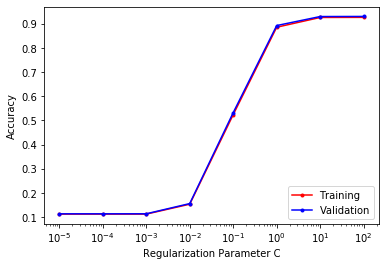

Best C for training: 100.00000000000001, Best C for validation: 100.00000000000001


In [90]:
Cs = [0.00001 * math.pow(10, x) for x in range(0, 8)]
num_training = 2000
accuraciesC = {"train": [], "val": []}
for c in Cs:
    print(f"Training with regularlization param {c}")
    mnist_clf = svm.SVC(kernel='poly', C=c)
    
    training_y = np.asarray(mnist_training_y).reshape(-1)
    validation_y = np.asarray(mnist_validation_y).reshape(-1)
    
    mnist_clf.fit(mnist_training_x[:num_training, :], training_y[:num_training])
    
    training_acc = metrics.accuracy_score(training_y, mnist_clf.predict(mnist_training_x))
    val_acc = metrics.accuracy_score(validation_y, mnist_clf.predict(mnist_validation_x))
    
    accuraciesC["train"].append(training_acc)
    accuraciesC["val"].append(val_acc)
    
    print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")
    
plt.plot(Cs, accuraciesC["train"], '.r-')
plt.plot(Cs, accuraciesC["val"], '.b-')

ax = plt.gca()
ax.set_xscale('log')
plt.legend(['Training', 'Validation'], loc=4)
plt.xlabel("Regularization Parameter C")
plt.ylabel("Accuracy")

plt.show()

maxCtrain = max(zip(Cs,accuraciesC["train"]), key=lambda x: x[1])[0]
maxCval = max(zip(Cs,accuraciesC["train"]), key=lambda x: x[1])[0]

print(f"Best C for training: {maxCtrain}, Best C for validation: {maxCval}")

In [91]:
num_training = 30000
mnist_clf = svm.SVC(kernel='poly', C=100)
    
training_y = np.asarray(mnist_training_y).reshape(-1)
validation_y = np.asarray(mnist_validation_y).reshape(-1)

mnist_clf.fit(mnist_training_x[:num_training, :], training_y[:num_training])


training_acc = metrics.accuracy_score(training_y, mnist_clf.predict(mnist_training_x))
val_acc = metrics.accuracy_score(validation_y, mnist_clf.predict(mnist_validation_x))

# accuracies["train"].append(training_acc)
# accuracies["val"].append(val_acc)

print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")

Training accuracy: 0.98786 
Validation Accuracy: 0.9733



**Running best MNIST nonlinear SVM model on test set and saving predictions:**

In [92]:
from save_csv import *
results_to_csv(mnist_clf.predict(scaler.fit_transform(createHogFeature(complete_dataset["mnist"]["test_data"]))))

finished 0 finished 1000 finished 2000 finished 3000 finished 4000 finished 5000 finished 6000 finished 7000 finished 8000 finished 9000 

## Question 3,5 for Spam/Ham Classification

In [15]:
#Training on Spam/Ham Dataset

spam_clf = svm.SVC(kernel='linear')

training_ints = [100, 200, 500, 1000, 2000, spam_training_x.shape[0]]
accuraciesSpam = {"train": [], "val": []}

for num_training in training_ints:
    
    print(f"Training with {num_training} examples")
    
    training_y = np.asarray(spam_training_y).reshape(-1)
    validation_y = np.asarray(spam_validation_y).reshape(-1)
    
    spam_clf.fit(spam_training_x[:num_training, :], training_y[:num_training])
    
    
    training_acc = metrics.accuracy_score(training_y, spam_clf.predict(spam_training_x))
    val_acc = metrics.accuracy_score(validation_y, spam_clf.predict(spam_validation_x))
    
    accuraciesSpam["train"].append(training_acc)
    accuraciesSpam["val"].append(val_acc)
    
    print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")

Training with 100 examples
Training accuracy: 0.7851099830795262 
Validation Accuracy: 0.7574879227053141

Training with 200 examples
Training accuracy: 0.8013052936910805 
Validation Accuracy: 0.7816425120772947

Training with 500 examples
Training accuracy: 0.7986463620981388 
Validation Accuracy: 0.7777777777777778

Training with 1000 examples
Training accuracy: 0.8005801305293692 
Validation Accuracy: 0.7845410628019324

Training with 2000 examples
Training accuracy: 0.8025138989605994 
Validation Accuracy: 0.7874396135265701

Training with 4137 examples
Training accuracy: 0.8112158569011361 
Validation Accuracy: 0.7913043478260869



In [ ]:
plt.plot(training_ints, accuraciesSpam["train"], '.r-')
plt.plot(training_ints, accuraciesSpam["val"], '.b-')
plt.legend(['Training', 'Validation'], loc=4)
plt.xlabel("Num Training Examples")
plt.ylabel("Accuracy")
plt.show()

In [50]:
spam_trainingFull_x = np.concatenate((spam_training_x, spam_validation_x), axis=0)
spam_trainingFull_y = np.concatenate((spam_training_y, spam_validation_y), axis=0)
spam_trainingFull = np.concatenate((spam_trainingFull_x, spam_trainingFull_y), axis=1)

shuffled_indices = list(range(0, spam_trainingFull.shape[0]))
np.random.shuffle(shuffled_indices)

k = 5
lenPartition = math.floor(len(shuffled_indices) / k)
partitions = []
for i in range(0, k):
    if (i != k - 1):
        partitions.append(shuffled_indices[i*lenPartition:(i+1)*lenPartition])
    else:
        partitions.append(shuffled_indices[i*lenPartition:])

In [62]:
Cs = [0.00001 * math.pow(10, x) for x in range(0, 8)]
accuraciesSpamC = []
for c in Cs:
    cv_accuracy_val = 0
    print(f"Training spam using C={c}")
    for i in range(0, k):
        print(f"K-Fold iteration {i+1}")
        spam_clf = svm.SVC(kernel='linear', C=c)
        
        spam_training = spam_trainingFull[[ind for x in range(0, k) for ind in partitions[x] if x != i], :]
        spam_training_x, spam_training_y = spam_training[:, :-1], spam_training[:, -1:]
        spam_valdation = spam_trainingFull[partitions[i], :]
        spam_valdation_x, spam_valdation_y = spam_valdation[:, :-1], spam_valdation[:, -1:]
        
        
        training_y = np.asarray(spam_training_y).reshape(-1)
        validation_y = np.asarray(spam_validation_y).reshape(-1)
        
        spam_clf.fit(spam_training_x, training_y)
    
        val_acc = metrics.accuracy_score(validation_y, spam_clf.predict(spam_validation_x))
        print(f"Validation accuracy: {val_acc}\n")
    
        cv_accuracy_val = cv_accuracy_val + val_acc
        
    print(f"Cross validation accuracy: {cv_accuracy_val / k}\n")
    accuraciesSpamC.append(cv_accuracy_val / k)
        
        
        
        
        
        

Training spam using C=1e-05
K-Fold iteration 1
Validation accuracy: 0.6956521739130435

K-Fold iteration 2
Validation accuracy: 0.6956521739130435

K-Fold iteration 3
Validation accuracy: 0.6956521739130435

K-Fold iteration 4
Validation accuracy: 0.6956521739130435

K-Fold iteration 5
Validation accuracy: 0.6956521739130435

Cross validation accuracy: 0.6956521739130435

Training spam using C=0.0001
K-Fold iteration 1
Validation accuracy: 0.7014492753623188

K-Fold iteration 2
Validation accuracy: 0.7014492753623188

K-Fold iteration 3
Validation accuracy: 0.6995169082125604

K-Fold iteration 4
Validation accuracy: 0.7014492753623188

K-Fold iteration 5
Validation accuracy: 0.702415458937198

Cross validation accuracy: 0.701256038647343

Training spam using C=0.001
K-Fold iteration 1
Validation accuracy: 0.7420289855072464

K-Fold iteration 2
Validation accuracy: 0.740096618357488

K-Fold iteration 3
Validation accuracy: 0.740096618357488

K-Fold iteration 4
Validation accuracy: 0.742

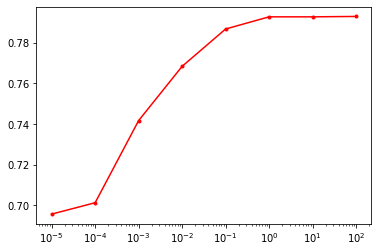

Best C for cross-validation: 100.00000000000001


In [63]:
plt.plot(Cs, accuraciesSpamC, '.r-')

ax = plt.gca()
ax.set_xscale('log')

plt.xlabel("Regularization Parameter C")
plt.ylabel("Cross-Validation Accuracy")

plt.show()

pp = max(zip(Cs,accuraciesSpamC), key=lambda x: x[1])[0]

print(f"Best C for cross-validation: {pp}")

In [64]:
partition_length = math.ceil(complete_dataset["spam"]["training_data"].shape[0]*0.2)
spam_validation, spam_training = partitionDataSet(complete_dataset["spam"]["training_data"], \
                               complete_dataset["spam"]["training_labels"], partition_length)

spam_validation_x = spam_validation[:, :-1]
spam_validation_y = spam_validation[:, -1:]
spam_training_x = spam_training[:, :-1]
spam_training_y = spam_training[:, -1:]

spam_clf = svm.SVC(kernel='linear', C=100)

training_y = np.asarray(spam_training_y).reshape(-1)
validation_y = np.asarray(spam_validation_y).reshape(-1)

spam_clf.fit(spam_training_x, training_y)

training_acc = metrics.accuracy_score(training_y, spam_clf.predict(spam_training_x))
val_acc = metrics.accuracy_score(validation_y, spam_clf.predict(spam_validation_x))
    
print(f"Training accuracy: {training_acc} \nValidation Accuracy: {val_acc}\n")

Training accuracy: 0.802997341068407 
Validation Accuracy: 0.7980676328502415



**Using best classifier on spam test set and saving**

In [65]:
results_to_csv(spam_clf.predict(complete_dataset["spam"]["test_data"]))

## Question 3 for CIFAR-10 Image Classification